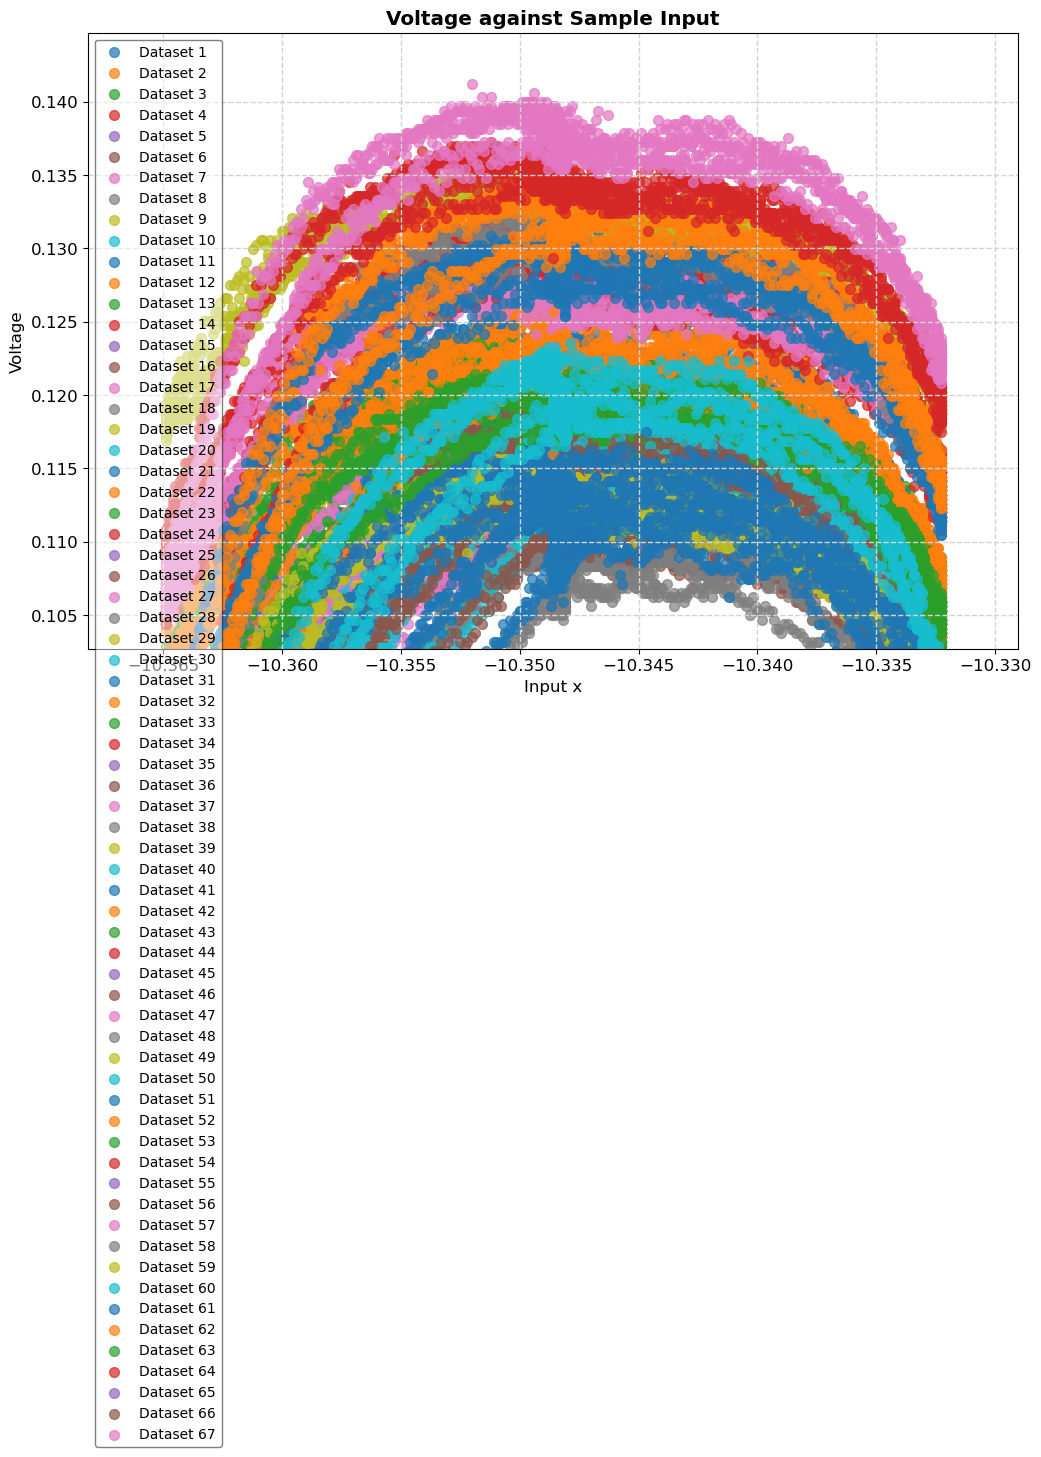

For dataset 1, the index of the maximum value is -5.873285 and the max is 0.09677492863732
For dataset 2, the index of the maximum value is -5.872725 and the max is 0.106817609911
For dataset 3, the index of the maximum value is -5.87305 and the max is 0.107121933586
For dataset 4, the index of the maximum value is -5.873265 and the max is 0.1150343491349
For dataset 5, the index of the maximum value is -0.0425 and the max is 0.0572128508925
For dataset 6, the index of the maximum value is -10.3486 and the max is 0.11412137811
For dataset 7, the index of the maximum value is -10.3406 and the max is 0.1183819095595
For dataset 8, the index of the maximum value is -0.039 and the max is 0.1080349046108
For dataset 9, the index of the maximum value is -10.3491 and the max is 0.1180775858845
For dataset 10, the index of the maximum value is -10.3496 and the max is 0.1205121752842
For dataset 11, the index of the maximum value is -10.3488 and the max is 0.1241640593837
For dataset 12, the in

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

def ReadData(fileLocation):
    # Check the file extension and read the data accordingly
    if fileLocation.endswith('.txt'):
        # Read the data from the text file
        with open(fileLocation, "r") as file:
            data = file.readlines()

        # Initialize empty lists to store the x and y values
        x_values = []
        y_values = []

        # Iterate through the data lines and extract the x and y values
        for line in data:
            values = line.strip().split()
            if len(values) == 2:
                x_value = float(values[0])
                y_value = float(values[1])
                x_values.append(x_value)
                y_values.append(y_value)

        # Create a pandas DataFrame from the extracted data
        data = pd.DataFrame({'X': x_values, 'Y': y_values})
    elif fileLocation.endswith('.csv'):
        data = pd.read_csv(fileLocation)
    elif fileLocation.endswith('.xls') or fileLocation.endswith('.xlsx'):
        data = pd.read_excel(fileLocation)
    else:
        return None
    
    return data

# Set the directory where the data sets are located
data_dir = 'errorDataset'

# Create an empty list to store the data
data_list = []

# Loop through the files in the directory
for filename in os.listdir(data_dir):
    # Check if the file is in a supported format
    if filename.endswith('.txt') or filename.endswith('.csv') or filename.endswith('.xls') or filename.endswith('.xlsx'):
        # Construct the full file path
        file_path = os.path.join(data_dir, filename)
        # Read the data using the ReadData() function
        data = ReadData(file_path)
        # Append the data to the list
        if data is not None:
            data_list.append(data)

# Now you can work with the data in the data_list
if data_list:
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set the font size and style
    plt.rcParams.update({'font.size': 12})
   # plt.style.use('seaborn-whitegrid')

    # Iterate through the data and plot each dataset
    for i, data in enumerate(data_list):
        voltage = data["Y"]
        x_value = data["X"]
        ax.scatter(x_value, voltage, label=f"Dataset {i+1}", s=50, alpha=0.7)

    # Add labels and title
    ax.set_xlabel("Input x")
    ax.set_ylabel("Voltage")
    ax.set_title("Voltage against Sample Input", fontweight='bold')

    # Adjust the legend
    legend = ax.legend(loc='upper left', fontsize=10, framealpha=0.5)
    legend.get_frame().set_edgecolor('k')

    # Adjust the grid
    ax.grid(color='lightgray', linestyle='--', linewidth=1)

    # Adjust the axis limits to fit the data
    x_min, x_max = min(data["X"]), max(data["X"])
    y_min, y_max = min(data["Y"]), max(data["Y"])
    ax.set_xlim(x_min - 0.1 * (x_max - x_min), x_max + 0.1 * (x_max - x_min))
    ax.set_ylim(y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))

    plt.show()

    # Look for the max position directly
    def DirectMaxSearch(Voltage):
        maxIndex = np.argmax(Voltage)
        return x_value[maxIndex]

    # Test the function
    for i, data in enumerate(data_list):
        voltage = data["Y"]
        x_value = data["X"]
        directMax = DirectMaxSearch(voltage)
        maxi = np.max(voltage)
        print(f'For dataset {i+1}, the index of the maximum value is {directMax} and the max is {maxi}')

    # Look for max using the Gaussian fit
    def gaussian(x, a, mu, sigma):
        return a * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

    def fit_gaussian(x, y):
        # Preprocessing (example: smoothing)
        y_smoothed = np.convolve(y, np.ones(5) / 5, mode='same')

        # Improved initial guess
        p0 = [np.max(y_smoothed), np.mean(x), np.std(x)]

        try:
            popt, pcov = curve_fit(gaussian, x, y_smoothed, p0=p0)
            peak_gaussian = popt[1]
            return peak_gaussian
        except RuntimeError:
            print("Curve fitting failed")
            return None

    # Test the Gaussian fit function
    for i, data in enumerate(data_list):
        voltage = data["Y"]
        x_value = data["X"]
        gaussianMax = fit_gaussian(x_value, voltage)
        gaussianMaxValue = voltage[np.argmax(gaussianMax)]
        print(f"For dataset {i+1}, the Gaussian max position is: {gaussianMax} and value is {gaussianMaxValue}")